### Quetion 1
Scipy:

We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.

Task:

1.fitting it to the periodic function
2.plot the fit

Data
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import pandas as pd
import seaborn as sns

In [54]:
max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
months = np.arange(1,13)

In [55]:
dfCity = pd.DataFrame({'MaxTemp':max_temp,'MinTemp':min_temp,'Months':months})
dfCity

,MaxTemp,MinTemp,Months
0,39,21,1
1,41,23,2
2,43,27,3
3,47,28,4
4,49,32,5
5,51,35,6
6,45,31,7
7,38,28,8
8,37,21,9
9,29,19,10


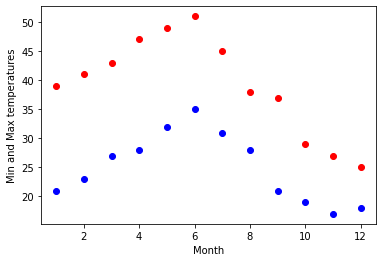

In [57]:
plt.plot(dfCity.Months, dfCity.MaxTemp, 'ro')
plt.plot(dfCity.Months, dfCity.MinTemp, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and Max temperatures')
plt.show()

#### Periodic Funtion

In [59]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, dfCity.Months,
                                      dfCity.MaxTemp, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, dfCity.Months,
                                      dfCity.MinTemp, [-40, 20, 0])

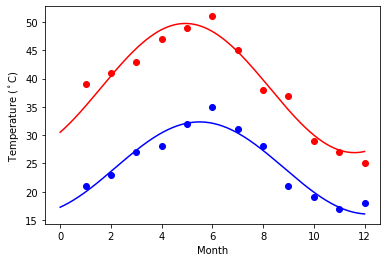

In [61]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(dfCity.Months, dfCity.MaxTemp, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(dfCity.Months, dfCity.MinTemp, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

### Question 2
Matplotlib:

This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [8]:
# titanic = sns.load_dataset('titanic')[['sex']]
titanic = sns.load_dataset('titanic')

In [9]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.value_counts()

In [ ]:
titanic.dtypes

In [21]:
# titanic["sex"] = titanic["sex"].astype(str)

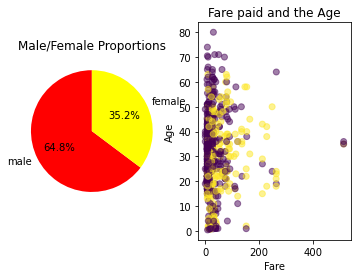

In [13]:
#1. Create a pie chart presenting the male/female proportion
count=titanic['sex'].value_counts()
colors = ['red', 'yellow']
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.pie(count.values.tolist(), labels=count.index.values.tolist(), colors=colors,startangle=90,autopct='%.1f%%')
ax1.set_title('Male/Female Proportions')


#2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender


ax2.set_xlabel('Fare')
ax2.set_ylabel('Age')
ax2.set_title('Fare paid and the Age')
ax2.scatter(titanic['fare'], titanic['age'], c= pd.factorize(titanic['sex'])[0], alpha=0.5)